In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.resnet_v2 import ResNet152V2

from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Splitted Dataset/train'
valid_path = 'Splitted Dataset/test'

In [3]:
inRes= InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inRes.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Splitted Dataset/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inRes.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
# create a model object
inResModel = Model(inputs=inRes.input, outputs=prediction)

In [8]:
# view the structure of the model
inResModel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
inResModel.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Splitted Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Splitted Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
s = inResModel.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

F:\Internship Project Source Files\Lungs Disease Detection Project Files\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
95/95 [==============================] - 1038s 11s/step - loss: 2.8925 - accuracy: 0.6634 - val_loss: 1.7377 - val_accuracy: 0.7190
Epoch 2/25
95/95 [==============================] - 1066s 11s/step - loss: 1.2780 - accuracy: 0.7626 - val_loss: 1.6322 - val_accuracy: 0.7679
Epoch 3/25
95/95 [==============================] - 1046s 11s/step - loss: 1.0938 - accuracy: 0.7922 - val_loss: 0.9607 - val_accuracy: 0.8040
Epoch 4/25
95/95 [==============================] - 1097s 12s/step - loss: 1.1015 - accuracy: 0.8010 - val_loss: 1.5287 - val_accuracy: 0.7689
Epoch 5/25
95/95 [==============================] - 1101s 12s/step - loss: 1.1209 - accuracy: 0.8053 - val_loss: 1.1974 - val_accuracy: 0.7931
Epoch 6/25
95/95 [==============================] - 1128s 12s/step - loss: 1.2697 - accuracy: 0.8099 - val_loss: 3.4153 - val_accuracy: 0.7323
Epoch 7/25
95/95 [==============================] - 913s 10s/step - loss: 1.5901 - accuracy: 0.7937 - val_loss: 1.7734 - val_accuracy: 0.7773


In [14]:
denseNet= DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [15]:
# don't train existing weights
for layer in denseNet.layers:
    layer.trainable = False

In [16]:
# useful for getting number of output classes
folders = glob('Splitted Dataset/train/*')

In [17]:
# our layers - you can add more if you want
x = Flatten()(denseNet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [18]:
# create a model object
densenetModel = Model(inputs=denseNet.input, outputs=prediction)

In [19]:
# view the structure of the model
densenetModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [20]:
# tell the model what cost and optimization method to use
densenetModel.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Splitted Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [23]:
test_set = test_datagen.flow_from_directory('Splitted Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
t = densenetModel.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/25
95/95 [==============================] - 959s 10s/step - loss: 1.7972 - accuracy: 0.7526 - val_loss: 0.9302 - val_accuracy: 0.8173
Epoch 2/25
95/95 [==============================] - 946s 10s/step - loss: 0.7486 - accuracy: 0.8249 - val_loss: 0.9090 - val_accuracy: 0.8040
Epoch 3/25
95/95 [==============================] - 944s 10s/step - loss: 0.7853 - accuracy: 0.8461 - val_loss: 0.8199 - val_accuracy: 0.8474
Epoch 4/25
95/95 [==============================] - 969s 10s/step - loss: 0.6812 - accuracy: 0.8611 - val_loss: 1.0434 - val_accuracy: 0.8138
Epoch 5/25
95/95 [==============================] - 1019s 11s/step - loss: 0.7342 - accuracy: 0.8589 - val_loss: 1.4396 - val_accuracy: 0.8049
Epoch 6/25
95/95 [==============================] - 949s 10s/step - loss: 0.8033 - accuracy: 0.8631 - val_loss: 1.0816 - val_accuracy: 0.8321
Epoch 7/25
95/95 [==============================] - 942s 10s/step - loss: 0.7461 - accuracy: 0.8751 - val_loss: 1.4896 - val_accuracy: 0.8425
Epoch

In [25]:
xCept= Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in xCept.layers:
    layer.trainable = False

In [27]:
# useful for getting number of output classes
folders = glob('Splitted Dataset/train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(xCept.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [29]:
# create a model object
xcModel = Model(inputs=xCept.input, outputs=prediction)

In [30]:
# view the structure of the model
xcModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [31]:
# tell the model what cost and optimization method to use
xcModel.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Splitted Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [34]:
test_set = test_datagen.flow_from_directory('Splitted Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
u = xcModel.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/25
95/95 [==============================] - 686s 7s/step - loss: 2.0449 - accuracy: 0.7053 - val_loss: 1.3621 - val_accuracy: 0.7541
Epoch 2/25
95/95 [==============================] - 681s 7s/step - loss: 1.1004 - accuracy: 0.7830 - val_loss: 0.9779 - val_accuracy: 0.8267
Epoch 3/25
95/95 [==============================] - 681s 7s/step - loss: 1.2517 - accuracy: 0.7782 - val_loss: 1.1829 - val_accuracy: 0.8059
Epoch 4/25
95/95 [==============================] - 680s 7s/step - loss: 1.1868 - accuracy: 0.8059 - val_loss: 1.2151 - val_accuracy: 0.8163
Epoch 5/25
95/95 [==============================] - 687s 7s/step - loss: 1.0765 - accuracy: 0.8219 - val_loss: 1.2305 - val_accuracy: 0.8207
Epoch 6/25
95/95 [==============================] - 709s 7s/step - loss: 1.0526 - accuracy: 0.8233 - val_loss: 1.8709 - val_accuracy: 0.7709
Epoch 7/25
95/95 [==============================] - 775s 8s/step - loss: 1.0855 - accuracy: 0.8373 - val_loss: 1.3363 - val_accuracy: 0.8059
Epoch 8/25
95

In [36]:
resV2= ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [37]:
# don't train existing weights
for layer in resV2.layers:
    layer.trainable = False

In [38]:
# useful for getting number of output classes
folders = glob('Splitted Dataset/train/*')

In [39]:
# our layers - you can add more if you want
x = Flatten()(resV2.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [40]:
# create a model object
resV2Model = Model(inputs=resV2.input, outputs=prediction)

In [41]:
# view the structure of the model
resV2Model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [42]:
# tell the model what cost and optimization method to use
resV2Model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [43]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Splitted Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6054 images belonging to 5 classes.


In [45]:
test_set = test_datagen.flow_from_directory('Splitted Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2025 images belonging to 5 classes.


In [46]:
# fit the model
# Run the cell. It will take some time to execute
v = resV2Model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=25,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/25
95/95 [==============================] - 1515s 16s/step - loss: 2.8872 - accuracy: 0.7182 - val_loss: 1.6261 - val_accuracy: 0.7931
Epoch 2/25
95/95 [==============================] - 1501s 16s/step - loss: 1.7037 - accuracy: 0.8110 - val_loss: 1.5993 - val_accuracy: 0.8119
Epoch 3/25
95/95 [==============================] - 1504s 16s/step - loss: 1.6535 - accuracy: 0.8345 - val_loss: 2.4227 - val_accuracy: 0.7867
Epoch 4/25
95/95 [==============================] - 1501s 16s/step - loss: 1.6154 - accuracy: 0.8398 - val_loss: 2.4609 - val_accuracy: 0.8148
Epoch 5/25
95/95 [==============================] - 1504s 16s/step - loss: 1.4020 - accuracy: 0.8579 - val_loss: 2.1687 - val_accuracy: 0.8198
Epoch 6/25
95/95 [==============================] - 1511s 16s/step - loss: 1.2604 - accuracy: 0.8725 - val_loss: 2.1114 - val_accuracy: 0.8449
Epoch 7/25
95/95 [==============================] - 1520s 16s/step - loss: 1.1140 - accuracy: 0.8809 - val_loss: 2.3921 - val_accuracy: 0.8415

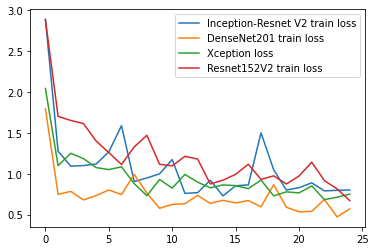

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt

plt.plot(s.history['loss'], label='Inception-Resnet V2 train loss')
plt.plot(t.history['loss'], label='DenseNet201 train loss')
plt.plot(u.history['loss'], label='Xception loss')
plt.plot(v.history['loss'], label='Resnet152V2 train loss')
plt.legend()
plt.show()
plt.savefig('compTrain_loss16BS')

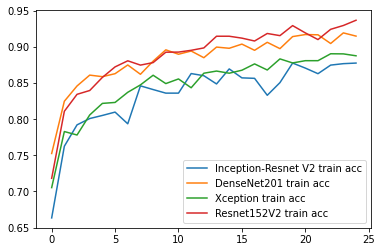

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(s.history['accuracy'], label='Inception-Resnet V2 train acc')
plt.plot(t.history['accuracy'], label='DenseNet201 train acc')
plt.plot(u.history['accuracy'], label='Xception train acc')
plt.plot(v.history['accuracy'], label='Resnet152V2 train acc')
plt.legend()
plt.show()
plt.savefig('compTrain_acc16BS')

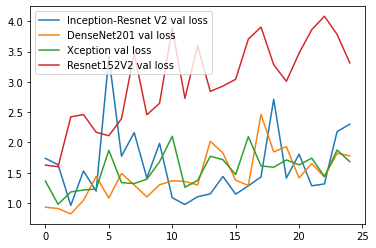

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(s.history['val_loss'], label='Inception-Resnet V2 val loss')
plt.plot(t.history['val_loss'], label='DenseNet201 val loss')
plt.plot(u.history['val_loss'], label='Xception val loss')
plt.plot(v.history['val_loss'], label='Resnet152V2 val loss')
plt.legend()
plt.show()
plt.savefig('compVal_loss16BS')

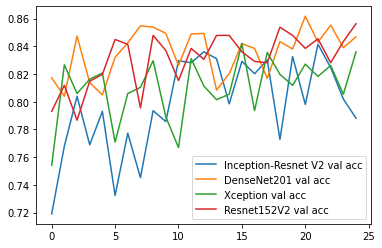

<Figure size 432x288 with 0 Axes>

In [50]:
plt.plot(s.history['val_accuracy'], label='Inception-Resnet V2 val acc')
plt.plot(t.history['val_accuracy'], label='DenseNet201 val acc')
plt.plot(u.history['val_accuracy'], label='Xception val acc')
plt.plot(v.history['val_accuracy'], label='Resnet152V2 val acc')
plt.legend()
plt.show()
plt.savefig('compVal_acc16BS')